# Ridge Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

Rozważmy następujący zbiór punktów:

In [2]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład 
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

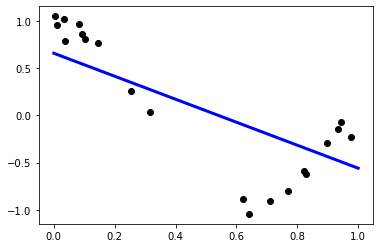

In [3]:
clf = Ridge(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


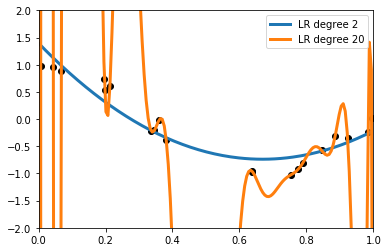

In [4]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 1000))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (Ridge Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001


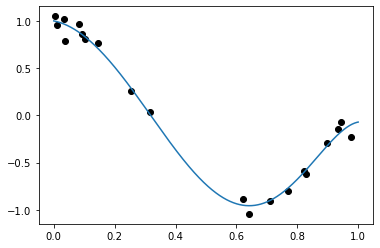

In [76]:
X = np.linspace(0, 1, 1000)
X = X.reshape(-1, 1)
plt.plot(x, y, 'ok')
model = make_pipeline(PolynomialFeatures(6), Ridge(alpha=0.0001))
model.fit(x, y)
plt.plot(X, model.predict(X))
plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha za pomocą komendy **GridSearchCV**. 

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
seed=123
kfold = model_selection.KFold(n_splits=10, random_state=seed)

params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8],
         'ridge__alpha': [1, 0.1, 0.001, 0.0001, 0.00001, 0.5]}
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge(alpha=1)),
                    param_grid=params,
                    cv=kfold,
                    refit=False)

In [75]:
grid.fit(x, y)
grid.best_params_

{'polynomialfeatures__degree': 6, 'ridge__alpha': 0.0001}

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [80]:
import pandas as pd
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [82]:
grid2 = GridSearchCV(make_pipeline(PolynomialFeatures(2), linear_model.Ridge()),
                    param_grid=params,
                    cv=kfold,
                    refit=False)

In [83]:
grid2.fit(X, y)
grid2.best_params_

d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.91424e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.33151e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.8758e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.92007e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.90647e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\skl

d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.57796e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09603e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20867e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09957e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.08247e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sk

d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40624e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39251e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.46116e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.55693e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40002e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sk

d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75419e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8493e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98839e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.76587e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98333e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\skl

d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.77096e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.24652e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.94195e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.07581e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.48774e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sk

d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24387e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.12569e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06841e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13411e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2408e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\skl

d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.10496e-45): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.6892e-45): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.69046e-45): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.84432e-45): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.10525e-45): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
d:\python\lib\site-packages\skl

{'polynomialfeatures__degree': 4, 'ridge__alpha': 1}